# Estudo de Caso: Text Mining para Análise de Sentimentos do RH

In [1]:
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
from nltk.probability import FreqDist
import string
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\danie\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# Leitura e armazenamento dos dados

In [2]:
textos = open('textos_RH.txt', mode = 'r', encoding = 'utf-8').read()

# Cleaning (Pré-processamento dos dados)

## Conversão do texto em minúsculo

In [3]:
textos = textos.lower()
textos

"um empresa muito organizada e seria.\nnão recomendo. produto defasado perante o mercado. preço abusivo em relação a concorrência.\nrotas de trabalho super saturadas. sem dúvidas o sistema da empresa é horrível.\no treinamento foi muito bom.\nsalário inconstitucional, menor que o mínimo. o salário não é compatível com o mercado.\ncade o meu acerto? esta demorando demais a depositar meu dinheiro do acerto.\no ambiente é bem organizado, postos de atendimento são disponibilizados ao funcionários atrás de um mapa bem elaborado, onde não causa confusões ao entrar para iniciar o trabalho, esse é um ponto positivo.  porém, a exigência no trabalho é muita e nao ha\nnão recomendo, é um serviço puxado, sem estrutura para suporte ao cliente, algumas informações solicitadas em ligação não é possível responder pois não tinha acesso. clientes falam da forma que quer\na empresa é ótima, é composta por pessoas muito competentes e apenas  pedi demissão porque consegui uma oportunidade mais interessante

## Remoção de pontuação

In [4]:
textos_sem_pontuacao = ''.join([p for p in textos if p not in string.punctuation])
print(textos_sem_pontuacao)

um empresa muito organizada e seria
não recomendo produto defasado perante o mercado preço abusivo em relação a concorrência
rotas de trabalho super saturadas sem dúvidas o sistema da empresa é horrível
o treinamento foi muito bom
salário inconstitucional menor que o mínimo o salário não é compatível com o mercado
cade o meu acerto esta demorando demais a depositar meu dinheiro do acerto
o ambiente é bem organizado postos de atendimento são disponibilizados ao funcionários atrás de um mapa bem elaborado onde não causa confusões ao entrar para iniciar o trabalho esse é um ponto positivo  porém a exigência no trabalho é muita e nao ha
não recomendo é um serviço puxado sem estrutura para suporte ao cliente algumas informações solicitadas em ligação não é possível responder pois não tinha acesso clientes falam da forma que quer
a empresa é ótima é composta por pessoas muito competentes e apenas  pedi demissão porque consegui uma oportunidade mais interessante para o meu perfil pessoal
boa 

## Tokenização

In [5]:
tokenizacao_palavras = nltk.word_tokenize(textos_sem_pontuacao)
print(tokenizacao_palavras)

['um', 'empresa', 'muito', 'organizada', 'e', 'seria', 'não', 'recomendo', 'produto', 'defasado', 'perante', 'o', 'mercado', 'preço', 'abusivo', 'em', 'relação', 'a', 'concorrência', 'rotas', 'de', 'trabalho', 'super', 'saturadas', 'sem', 'dúvidas', 'o', 'sistema', 'da', 'empresa', 'é', 'horrível', 'o', 'treinamento', 'foi', 'muito', 'bom', 'salário', 'inconstitucional', 'menor', 'que', 'o', 'mínimo', 'o', 'salário', 'não', 'é', 'compatível', 'com', 'o', 'mercado', 'cade', 'o', 'meu', 'acerto', 'esta', 'demorando', 'demais', 'a', 'depositar', 'meu', 'dinheiro', 'do', 'acerto', 'o', 'ambiente', 'é', 'bem', 'organizado', 'postos', 'de', 'atendimento', 'são', 'disponibilizados', 'ao', 'funcionários', 'atrás', 'de', 'um', 'mapa', 'bem', 'elaborado', 'onde', 'não', 'causa', 'confusões', 'ao', 'entrar', 'para', 'iniciar', 'o', 'trabalho', 'esse', 'é', 'um', 'ponto', 'positivo', 'porém', 'a', 'exigência', 'no', 'trabalho', 'é', 'muita', 'e', 'nao', 'ha', 'não', 'recomendo', 'é', 'um', 'serviç

## Remoção das Stopwords

In [6]:
nltk.download('stopwords')
stoplist = stopwords.words('portuguese')

palavras_sem_stop = [p for p in tokenizacao_palavras if p not in stoplist]
print(palavras_sem_stop)

['empresa', 'organizada', 'recomendo', 'produto', 'defasado', 'perante', 'mercado', 'preço', 'abusivo', 'relação', 'concorrência', 'rotas', 'trabalho', 'super', 'saturadas', 'dúvidas', 'sistema', 'empresa', 'horrível', 'treinamento', 'bom', 'salário', 'inconstitucional', 'menor', 'mínimo', 'salário', 'compatível', 'mercado', 'cade', 'acerto', 'demorando', 'demais', 'depositar', 'dinheiro', 'acerto', 'ambiente', 'bem', 'organizado', 'postos', 'atendimento', 'disponibilizados', 'funcionários', 'atrás', 'mapa', 'bem', 'elaborado', 'onde', 'causa', 'confusões', 'entrar', 'iniciar', 'trabalho', 'ponto', 'positivo', 'porém', 'exigência', 'trabalho', 'muita', 'nao', 'ha', 'recomendo', 'serviço', 'puxado', 'estrutura', 'suporte', 'cliente', 'algumas', 'informações', 'solicitadas', 'ligação', 'possível', 'responder', 'pois', 'acesso', 'clientes', 'falam', 'forma', 'quer', 'empresa', 'ótima', 'composta', 'pessoas', 'competentes', 'apenas', 'pedi', 'demissão', 'porque', 'consegui', 'oportunidade'

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\danie\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Verificação de palavras com mais frequência

In [7]:
freq = FreqDist(palavras_sem_stop)
freq = freq.most_common(10)
print(freq)

[('empresa', 122), ('trabalho', 36), ('bom', 22), ('boa', 22), ('ambiente', 21), ('trabalhar', 21), ('falta', 20), ('salário', 18), ('pessoas', 17), ('gestão', 16)]


In [9]:
freq_series = pd.Series(dict(freq))
print(freq_series)

empresa      122
trabalho      36
bom           22
boa           22
ambiente      21
trabalhar     21
falta         20
salário       18
pessoas       17
gestão        16
dtype: int64


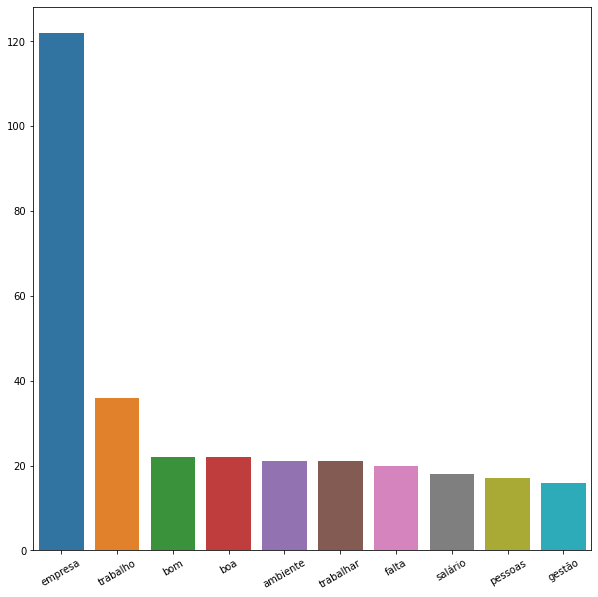

In [10]:
fig, ax = plt.subplots(figsize=(10,10))
freq_plot = sns.barplot(x=freq_series.index, y=freq_series.values, ax=ax)
plt.xticks(rotation=30);

## Geração da Wordcloud

In [11]:
nuvem_palavras = WordCloud(
                    background_color = 'white',
                    stopwords = stoplist,
                    height = 800,
                    width = 1600,
                    max_words = 100
)
nuvem_palavras.generate(textos)
nuvem_palavras.to_file('nuvem_palavras.png')

(-0.5, 1599.5, 799.5, -0.5)

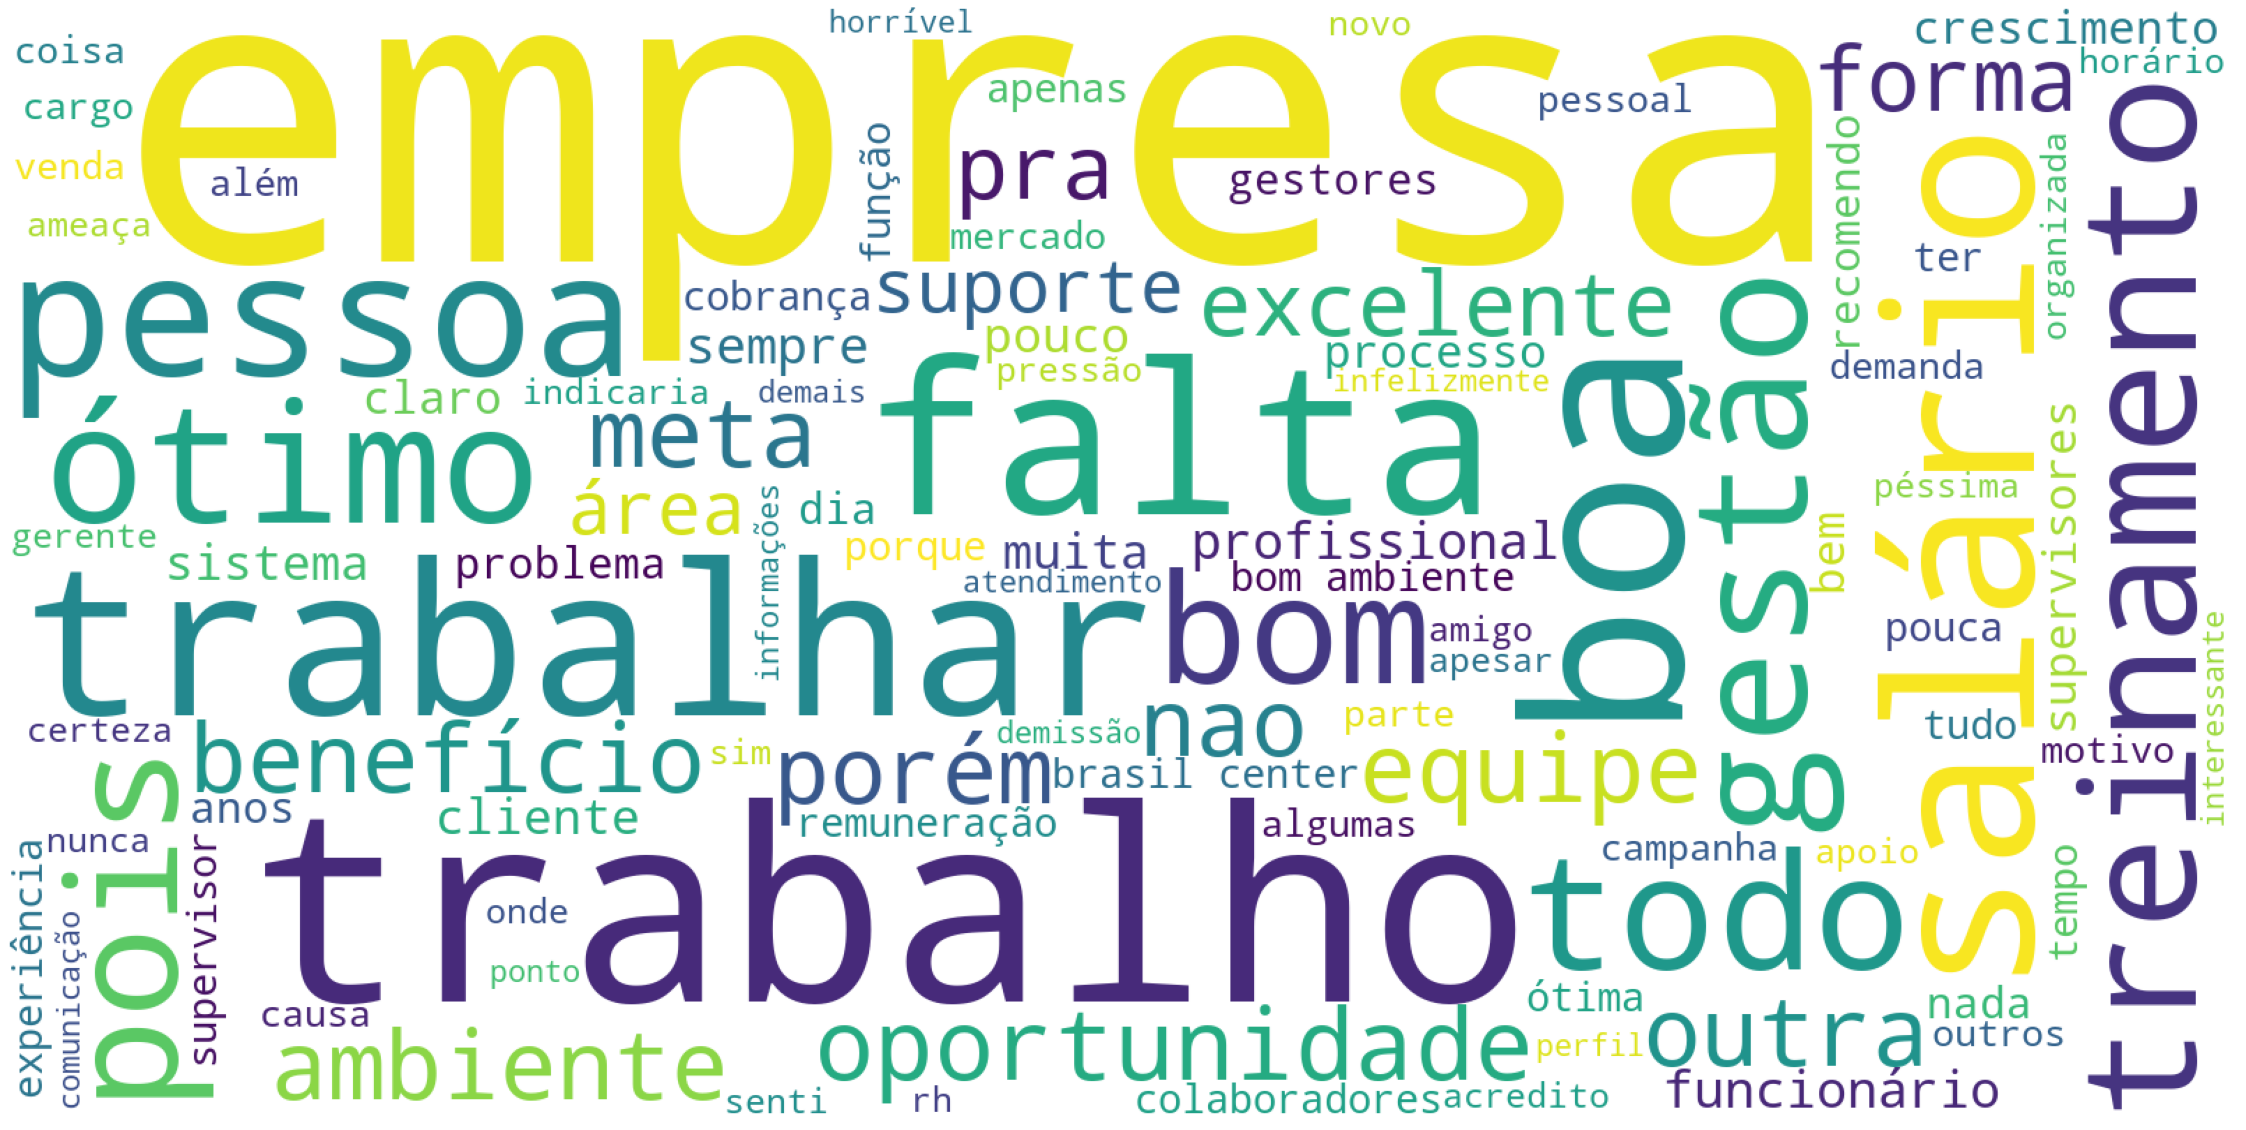

In [12]:
plt.figure(figsize=(40,30))
plt.imshow(nuvem_palavras)
plt.axis("off")

In [ ]:
x = 10

if (x > 0):
    print("O valor é positivo")
else:
    print("O valor é negativo")

In [ ]:
if (x > 10):
    if (x < 50):
        